    # Basic sentiment analysis

    In this example we look at two small sets of texts grouped into two classes:
    `positive_texts` and `negative_texts`.

In [22]:
import nltk
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
%matplotlib inline  

positive_texts = [
    "we love you",
    "they love us",
    "you are good",
    "he is good",
    "they love mary"
]

negative_texts = [
    "we hate you",
    "they hate us",
    "you are bad",
    "he is bad",
    "we hate mary"
]

    Combine `negative_texts` and `positive_texts` into a single list. 

In [23]:
all_texts = positive_texts + negative_texts
all_texts

['we love you',
 'they love us',
 'you are good',
 'he is good',
 'they love mary',
 'we hate you',
 'they hate us',
 'you are bad',
 'he is bad',
 'we hate mary']

    Create a list of all words occuring in the texts.

In [24]:
def get_words(text):
    # return list([word for word in text.split(' ')])
    for word in text.split(' '):
        yield word
        
all_words = [word for text in all_texts for word in get_words(text)]
all_words

['we',
 'love',
 'you',
 'they',
 'love',
 'us',
 'you',
 'are',
 'good',
 'he',
 'is',
 'good',
 'they',
 'love',
 'mary',
 'we',
 'hate',
 'you',
 'they',
 'hate',
 'us',
 'you',
 'are',
 'bad',
 'he',
 'is',
 'bad',
 'we',
 'hate',
 'mary']

    What are the unique words use in the texts?

In [25]:
unique_words = list(set(all_words))
unique_words


['he',
 'good',
 'mary',
 'we',
 'love',
 'you',
 'they',
 'us',
 'is',
 'bad',
 'are',
 'hate']

    Calculate the frequency distribution of words using nltk.FreqDist. Tabulate the
    result and plot the distribution of the 5 most common words.

 you   we they love hate   he good mary   us   is  bad  are 
   4    3    3    3    3    2    2    2    2    2    2    2 


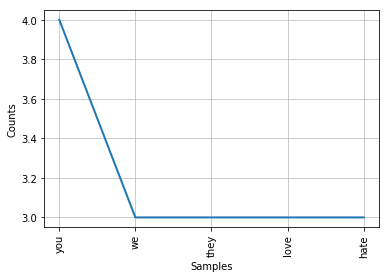

In [27]:
word_freqs = nltk.FreqDist(all_words)
word_freqs.tabulate()
word_freqs.plot(5, cumulative=False)

    What are the 3 most common words? 

In [7]:
word_freqs.most_common(3)


[('you', 4), ('we', 3), ('they', 3)]

    In what percent of the text does the word "mary" occur?

In [8]:
word_freqs.freq('mary')

0.06666666666666667

    Write a function that creates a vector of the same length as 
    the number of unique words for each text. At each index the list
    should have value 1 if the vocabulary word is contained in the text
    and zero otherwise.

In [18]:
def vectorize_text(text):
    text_vec = [0] * len(unique_words)
    text_words = text.split(' ')
    
    for i in range(len(unique_words) - 1):
        unique_word = unique_words[i]
        if unique_word in text_words:
            text_vec[i] = 1
    
    return text_vec

def vectorize_collection(col):
    return list(map(vectorize, col))

text_vectors = vectorize_collection(all_texts)
text_vectors_df = pd.DataFrame(text_vectors, columns = unique_words)
text_vectors_df

,he,good,mary,we,love,you,they,us,is,bad,are,hate
0,0,0,0,1,1,1,0,0,0,0,0,0
1,0,0,0,0,1,0,1,1,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,1,0
3,1,1,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,1,0,1,0,0,0,0,0
5,0,0,0,1,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,1,1,0,0,0,0
7,0,0,0,0,0,1,0,0,0,1,1,0
8,1,0,0,0,0,0,0,0,1,1,0,0
9,0,0,1,1,0,0,0,0,0,0,0,0


    Write a function that creates a vector of the same length as 
    the number of unique words for each text. At each index the list
    should have value 1 if the vocabulary word is contained in the text
    and zero otherwise.

In [ ]:
test_texts = [
    "they love mary",
    "they are good",
    "why do you hate mary",
    "they are almost always good",
    "we are very bad"
]

    Create a new list `labels`
    that contains "positive" for positive texts and "negative" for negative texts. 

In [10]:
labels = ["negative"] * len(negative_texts) + ["positive"] * len(positive_texts)

    Train a classification tree (use default settings) on the vectorized texts

In [ ]:
classifier = DecisionTreeClassifier(random_state=23)
classifier.fit(training_vectors, training_labels)
classifier.classes_

predictions = classifier.predict(testing_vectors)
predictions
test_texts
plot_tree(classifier)


classifier.feature_importances_
vectorizer.get_feature_names()
vectorizer.get_feature_names()[6]
vectorizer.get_feature_names()[2]
plt.show()

## TODO: plot importances?